In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('dataset/Project Dataset/sales_data.csv')

<b> Step 01 </b> Performing Data Inspection to understand its structure, missing values and data types

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93603 entries, 0 to 93602
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      93603 non-null  object 
 1   Model     93603 non-null  object 
 2   Quantity  93603 non-null  float64
dtypes: float64(1), object(2)
memory usage: 2.1+ MB


In [4]:
data.head()

,Date,Model,Quantity
0,15/4/2022,Multiplug,0.0
1,15/4/2022,Mobile P16,0.0
2,15/4/2022,Mobile N5,0.0
3,15/4/2022,Mobile H10,0.0
4,15/4/2022,Speaker,0.0


In [5]:
data.isnull().sum()

Date        0
Model       0
Quantity    0
dtype: int64

In [6]:
data.describe()

,Quantity
count,93603.000000
mean,0.071034
std,0.459867
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,38.000000


<b> Step 2 </b> Data formatting and cleaning
<ol>
    <li>Converting to date time object</li>
    <li>Sort the data based on the dates</li>
    <li>Check for duplicates</li>
    <li>Drop if any duplicates found</li>
</ol>

In [7]:
data['Date'] = pd.to_datetime(data['Date'], dayfirst=True)
data

,Date,Model,Quantity
0,2022-04-15,Multiplug,0.0
1,2022-04-15,Mobile P16,0.0
2,2022-04-15,Mobile N5,0.0
3,2022-04-15,Mobile H10,0.0
4,2022-04-15,Speaker,0.0
...,...,...,...
93598,2022-04-14,18 C AC,0.0
93599,2022-04-14,12 C AC,0.0
93600,2022-04-14,24 B AC,0.0
93601,2022-04-14,24 C AC,0.0


In [8]:
data = data.sort_values(by = 'Date')
data

,Date,Model,Quantity
92003,2022-04-01,18 F AC,0.0
91971,2022-04-01,3X7NEXX,0.0
91970,2022-04-01,2T5GDEL,0.0
91969,2022-04-01,2T5RRLX-GX,0.0
91968,2022-04-01,2T5RRLX-XX,0.0
...,...,...,...
91792,2024-04-30,40 inch LED,0.0
91791,2024-04-30,32 inch LED,0.0
91758,2024-04-30,Multiplug,0.0
91803,2024-04-30,1D4GDEH,1.0


In [9]:
print(data.duplicated().sum())

0


<b>Step 3</b> Performing Basic analysis
<ol>
    <li>Total Quantity Sold per Day</li>
    <li>Total Quantity Sold per Product</li>
</ol>

In [10]:
daily_sales = data.groupby('Date')['Quantity'].sum().reset_index()

daily_sales

,Date,Quantity
0,2022-04-01,0.0
1,2022-04-02,18.0
2,2022-04-03,10.0
3,2022-04-04,16.0
4,2022-04-05,8.0
...,...,...
756,2024-04-26,0.0
757,2024-04-27,38.0
758,2024-04-28,30.0
759,2024-04-29,40.0


In [11]:
product_sales = data.groupby('Model')['Quantity'].sum().reset_index()

product_sales = product_sales.sort_values(by = 'Quantity', ascending = False)

product_sales

,Model,Quantity
3,17 inch Fan,979.0
2,14 inch Fan,367.0
62,32 inch LED,310.0
101,Kettle,290.0
112,Rice Cooker,276.0
...,...,...
76,3D8GDXX,4.0
77,3E8GDXX,3.0
23,1H5GDSH,2.0
28,2A3ELXX,2.0


<b>Step 4</b> Performing Data Visualization
<ol>
    <li>Time Series Plot of Daily Sales</li>
    <li>Bar Plot of Top 10 Best-Selling Products</li>
    <li>Monthly Sales</li>
    <li>Sales for each days of Week</li>
    <li>Moving Average for Trend Analysis</li>
</ol>

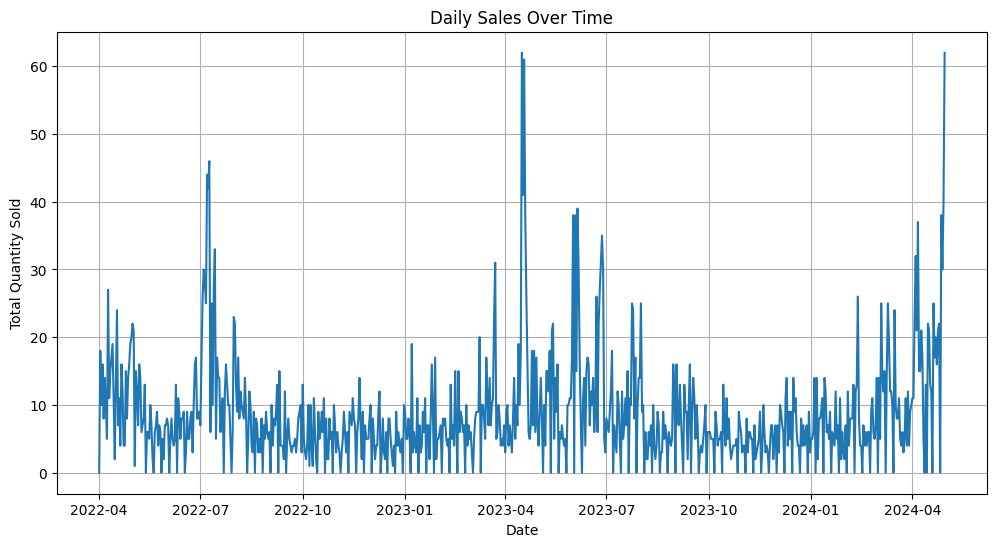

In [12]:
plt.figure(figsize=(12, 6))
plt.plot(daily_sales['Date'], daily_sales['Quantity'])
plt.title('Daily Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Quantity Sold')
plt.grid(True)
plt.show()

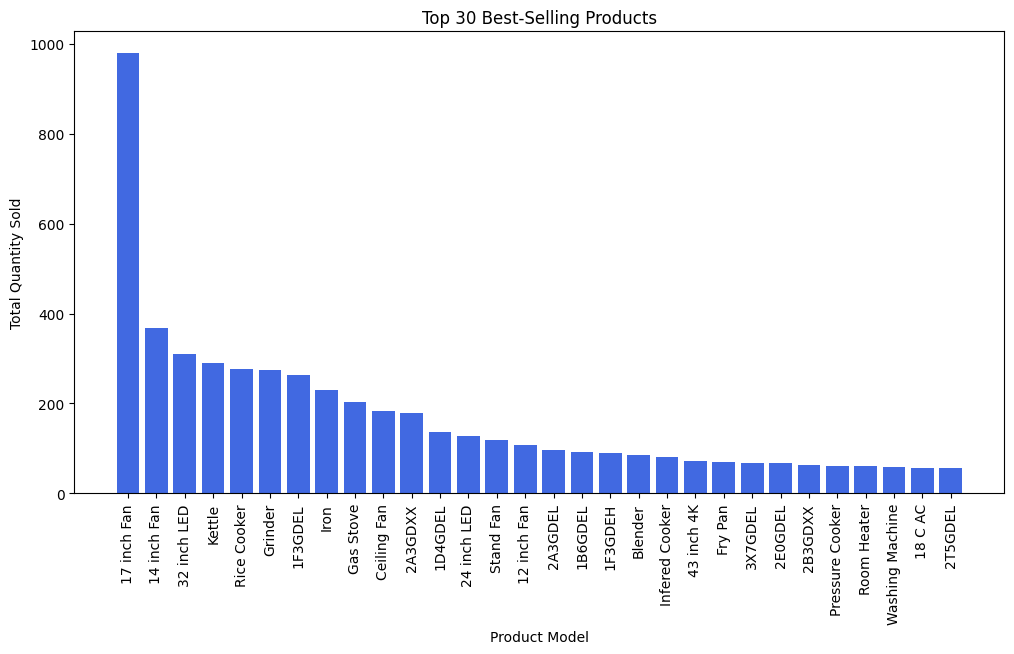

In [13]:
top_products = product_sales.head(30)

plt.figure(figsize = (12, 6))
plt.bar(top_products['Model'], top_products['Quantity'], color = 'royalblue')
plt.title('Top 30 Best-Selling Products')
plt.xlabel('Product Model')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation = 90)
plt.show()

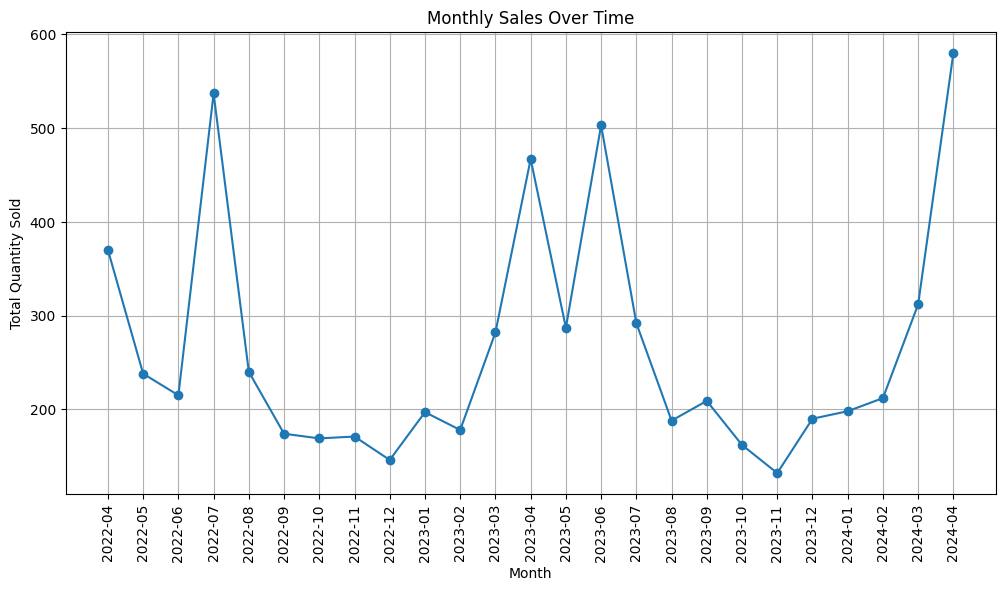

In [14]:
data['Month'] = data['Date'].dt.to_period('M')

monthly_sales = data.groupby('Month')['Quantity'].sum().reset_index()

plt.figure(figsize = (12, 6))
plt.plot(monthly_sales['Month'].astype(str), monthly_sales['Quantity'], marker = 'o')
plt.title('Monthly Sales Over Time')
plt.xlabel('Month')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation = 90)
plt.grid(True)
plt.show()

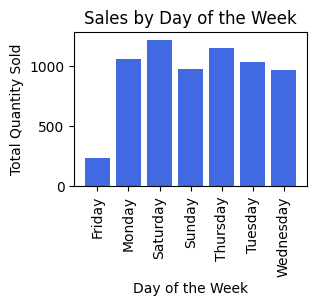

In [15]:
data['DayOfWeek'] = data['Date'].dt.day_name()

weekday_sales = data.groupby('DayOfWeek')['Quantity'].sum().reset_index()

plt.figure(figsize = (3, 2))
plt.bar(weekday_sales['DayOfWeek'], weekday_sales['Quantity'], color='royalblue')
plt.title('Sales by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation = 90)
plt.show()

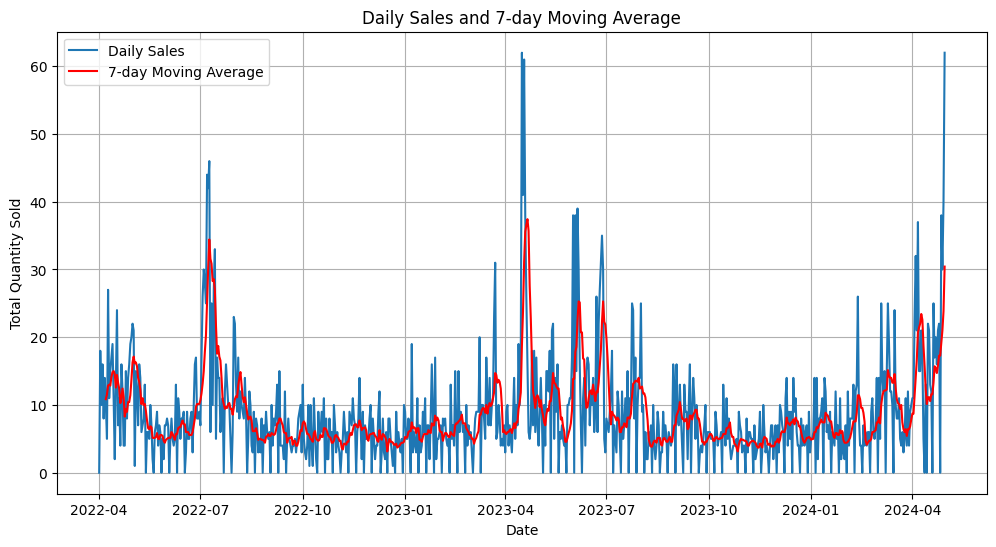

In [16]:
daily_sales['7-day MA'] = daily_sales['Quantity'].rolling(window=7).mean()

plt.figure(figsize=(12, 6))
plt.plot(daily_sales['Date'], daily_sales['Quantity'], label='Daily Sales')
plt.plot(daily_sales['Date'], daily_sales['7-day MA'], color='red', label='7-day Moving Average')
plt.title('Daily Sales and 7-day Moving Average')
plt.xlabel('Date')
plt.ylabel('Total Quantity Sold')
plt.legend()
plt.grid(True)
plt.show()
